# <center>PROJET NLP & WEB MINING 

## Installation des packages et données nécessaires

L'exécution du bloc ci-dessous permet dans un premier temps de télécharger les données depuis les adresses spécifiées en l'occurence depuis le répertoire de Guillaume Gravier. Les données seront enregistrées dans le répertoire courant et il ne restera plus qu'à les charger pour les exploiter.

Dans un second temps, il installe successivement les librairies feedparser, newspaper3k et le modèle fr_core_news_md de spacy. 

In [ ]:
#Téléchargement des données dans le répertoire courant
!wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/lesechos.json
!wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/sources.json

# installation des librairies
!pip install feedparser
!pip install newspaper3k
!python -m spacy download fr_core_news_md

--2023-03-05 17:06:44--  https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/lesechos.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8276509 (7.9M) [application/json]
Saving to: ‘lesechos.json’

lesechos.json       100%[===================>]   7.89M  10.1MB/s    in 0.8s    

2023-03-05 17:06:46 (10.1 MB/s) - ‘lesechos.json’ saved [8276509/8276509]

--2023-03-05 17:06:46--  https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/sources.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347 [application/json]
Saving to: ‘sources.json’

sources.json        100%[===================>]     347  --.-KB/s    in 0s      

2023-03-05 17:06:46 (58.9 MB/s) - ‘sources.json’

Chargement de la chaîne de traitement **spaCy** pour la langue française ***fr_core_news_md***

In [ ]:
import spacy
nlp = spacy.load('fr_core_news_md') # charger le package de traitement de langage 'fr_core_news_md'

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


**Chargement des librairies nécessaires à la réalisation des consignes**

In [ ]:
#Chargement des librairies nécessaires à la réalisation des consignes
import pandas as pd
import json
import feedparser as fp
import ssl
from newspaper import Article
import numpy
import pickle

import urllib.request 
from urllib.parse import urlparse

### **1. En vous aidant de l'exemple ci-dessus, écrire un premier programme (une cellule dans le notebook) qui réalise les opérations suivantes**



• **Lecture de la base de données existantes lesechos.json – regardez au passage la structure de ce fichier json et les informations qu’il contient**

> Le fichier lesechos s'affiche sous la forme d'un **dictionnaire imbriqué** de dictionnaire. Dans le premier dictionnaire les clés sont les liens des différents articles. A chaque lien d'article est associé à nouveau un dictionnaire qui comporte plusieurs clés tels que **le titre, la date, l'auteur,  la catégorie, le contenu de l'article, le lien de l'image et le lien du fichier**. Les valeurs associées à ces différentes clés sont soit des chaînes de caractère comme par exemple pour le ***titre*** et le ***contenu***, ou des listes de chaînes de caractère comme pour la clé ***auteur***.

> **Remarque** : Pour ce fichier lesechos, la plupart des informations concernant les auteurs sont vides, certaines dates sont manquantes. Quant aux images, les liens ne renvoient pas aux mêmes formats d'images: certains ont des extensions ***jpg*** tandis que d'autres ***png***. 


• **Identifier les informations disponibles dans le flux RSS de l'exemple ci-dessus et les éléments correspondants dans la structure de données retournées par fp.parse**


> Nous exécutons le code fourni à titre d'exemple pour comprendre la procédure de construction et de mise à jour de la base de données du fichier lesecho.json. La fonction **parse** du package **feedparser** permet de récupérer un flux RSS et la liste des éléments qu'il contient.

> A partir du flux RSS du journal **Le Monde**, nous récupérons des informations comme le titre d'un article, son lien, son contenu, sa date de publication.

>Le flux du journal **Le Monde** écouté se présente sous la forme d'un dictionnaire qui contient les élements suivants: -- 'bozo', 'entries', 'feed', 'headers', 'updated', 'updated_parsed', 'href', 'status', 'encoding', 'version', 'namespaces' --. C'est dans la clé **entries** que se situent les informations concernant les articles que nous voulons récupérer.
Les articles sont présentés sous forme d'entrée. Il y a 18 entrées dans le flux que nous avons écouté signifiant que le flux a permis de récupérer 18 articles du journal Le Monde. 
Le type de l'objet **data** est un feedparser.util.FeedParserDict. 
> Dans le feed nous avons les éléments suivants: 'title',
 'title_detail', 'subtitle', 'subtitle_detail', 'rights', 'rights_detail', 'links', 'link', 'published', 'published_parsed', 'language'.

> Dans chaque article on retrouve les éléments suivants: 'title', 'title_detail', 'published', 'published_parsed' 'summary', 'summary_detail', 'id', 'guidislink', 'link', 'links', 'media_content', 'content', 'media_credit','credit'.

> Il est important de noter que chaque site ou journal a sa propre façon de nommer les informations contenues dans son flux RSS. Cela pourrait être l'un des principaux problèmes liés à l'utilisation/la récupération d'informations provenant de plusieurs sites web (en raison du code source qui n'a pas toujours la même structure).


In [ ]:
# ouvrir le fichier json lesechos
f= open('lesechos.json')

# retourner un objet JSON sous forme de dictionnaire
echos = json.load(f)

#afficher la structure et les informations contenus dans le fichier
#print('lesechos')
display(echos)

In [ ]:
# (a) se premunir contre le blocage de commande

ssl._create_default_https_context = ssl._create_unverified_context
# (b) recuperer le fichier RSS

url = "https://www.lemonde.fr/rss/une.xml"
data = fp.parse(url)
# (c) visualiser les elements du fichier RSS
print(data.feed.title)
print(data.feed.published)
# (d) iterer sur les entrees du flux RSS
for item in data.entries:
  print(item.title, item.published, item.link)

Le Monde.fr - Actualités et Infos en France et dans le monde
Sun, 05 Mar 2023 21:15:08 +0000
Le vieillissement de la population, un défi qui dépasse de loin le problème des retraites Sun, 05 Mar 2023 17:00:09 +0100 https://www.lemonde.fr/economie/article/2023/03/05/le-vieillissement-de-la-population-un-defi-qui-depasse-de-loin-le-probleme-des-retraites_6164241_3234.html
A Bruxelles, la guerre du nucléaire entre l’Allemagne et la France fait rage Sun, 05 Mar 2023 06:03:16 +0100 https://www.lemonde.fr/economie/article/2023/03/05/a-bruxelles-la-guerre-du-nucleaire-entre-l-allemagne-et-la-france-fait-rage_6164197_3234.html
Grèves contre la réforme des retraites : des routiers à l’énergie, la mobilisation commence avant la « mise à l’arrêt » du 7 mars Sun, 05 Mar 2023 14:26:57 +0100 https://www.lemonde.fr/politique/article/2023/03/05/retraites-des-routiers-a-l-energie-la-mobilisation-commence-avant-la-mise-a-l-arret-du-7-mars_6164234_823448.html
Guerre en Ukraine, en direct : la bataille po

In [ ]:
#Explorer le flux de données écouté
print('Ce que nous avons dans le feed perser')
print(list(data.keys()))


Ce que nous avons dans le feed perser
['bozo', 'entries', 'feed', 'headers', 'updated', 'updated_parsed', 'href', 'status', 'encoding', 'version', 'namespaces']


In [ ]:
print('Les articles sont présentés sous forme d\'entrée. Il y a', len(data.entries), 'entrées dans le flux que nous avons écouté')
type(data)

data

Les articles sont présentés sous forme d'entrée. Il y a 18 entrées dans le flux que nous avons écouté


{'bozo': False,
 'entries': [{'title': 'Grèves contre la réforme des retraites\xa0: des routiers à l’énergie, la mobilisation commence avant la «\xa0mise à l’arrêt\xa0» du 7\xa0mars',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://www.lemonde.fr/rss/une.xml',
    'value': 'Grèves contre la réforme des retraites\xa0: des routiers à l’énergie, la mobilisation commence avant la «\xa0mise à l’arrêt\xa0» du 7\xa0mars'},
   'published': 'Sun, 05 Mar 2023 14:26:57 +0100',
   'published_parsed': time.struct_time(tm_year=2023, tm_mon=3, tm_mday=5, tm_hour=13, tm_min=26, tm_sec=57, tm_wday=6, tm_yday=64, tm_isdst=0),
   'summary': 'Plusieurs syndicats de routiers appellent à une grève anticipée, avec des blocages organisés dès lundi matin.',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://www.lemonde.fr/rss/une.xml',
    'value': 'Plusieurs syndicats de routiers appellent à une grève anticipée, avec des blocages organisé

In [ ]:
#Les éléments du feed
[ element for element in data.feed]

['title',
 'title_detail',
 'subtitle',
 'subtitle_detail',
 'rights',
 'rights_detail',
 'links',
 'link',
 'published',
 'published_parsed',
 'language']

In [ ]:
#Les éléments d'un article
[ element for element in data.entries[0]]

['title',
 'title_detail',
 'published',
 'published_parsed',
 'summary',
 'summary_detail',
 'id',
 'guidislink',
 'link',
 'links',
 'media_content',
 'content',
 'media_credit',
 'credit']

• **Pour chacun des flux RSS listés dans le fichier sources.json** :

– lire les données du flux RSS

– scanner les articles et repérer ceux qui ne sont pas déjà présents dans la base de données

In [ ]:
# Opening JSON file
f= open('sources.json')

# retourner un objet json sous forme de dictionbaire
source = json.load(f)
#print('Sources')
display(source)


{'Actualités valeurs': 'https://services.lesechos.fr/rss/investir-actualites-valeurs.xml',
 'Investir responsable': 'https://services.lesechos.fr/rss/investir-responsable.xml',
 'Marchés et Indices': 'https://services.lesechos.fr/rss/investir-marches-indices.xml',
 'Placement': 'https://services.lesechos.fr/rss/investir-placements.xml'}



> Le fichier source contient 4 flux de données (RSS feed) que sont "actualités valeurs", "investir responsable", "Marchés et indices" et "Placement". Ce sont tous des sous rubriques du site **Les echos**.







In [ ]:
#source = pd.read_json('sources.json', typ ='Series')
#source



> **Explication du code de la cellule ci-dessous :**
* On charge d'abord les url à écouter dans le ficher 'sources.json'. Les données chargées sont sous la forme d'un dictionnaire. On crée des listes vides une contenant la liste de tous les articles déjà scrappés et une autre contenant les articles à scrapper.  La liste des articles déjà scrappés permet de vérifier que les articles à récupérer ne son pas déjà disponibles dans notre base de données existante.                                                                                                                
>* Ensuite, pour chaque url contenue dans le fichier 'sources.json' :                                                                                    

 >* On vérifie que pour chaque lien contenu 'entries' l'article n'est pas dans la base de données ;
  
 >* On télécharge l'article grâce au package **newspaper3k** depuis son lien ;
  
 >* On traite l'article téléchargé pour extraire les informations qui nous intéressent : *title*, *date*, *author*, etc.
  
 >* et on ajoute les information à la base de données existante.



In [ ]:
#  se premunir contre le bloquage de commande
ssl._create_default_https_context = ssl._create_unverified_context
#  recuperer le fichier RSS
rss_url = list(source.values())
articles = list()
stored_url = set()

for url in rss_url:
  #lecture des flux de données RSS
  data = fp.parse(url) 
  #iterer sur les entrees du flux RSS
  for item in data.entries:
    #récupérer le lien de chaque article
    link = item.link
    #Vérifier si le lien est déjà contenu dans la base de données existante et passer à l'itération suivante le cas échéant
    if link in stored_url:
      continue
      #scanner l'article
    article = Article(link)
    article.download()
    article.parse()
    articles.append({'index': link,
          'title': article.title,
          'authors': article.authors,
          'content': article.text})
    stored_url.add(link) #ajouter le lien s'il ne figure pas déjà dans la base de données

  database =  pd.DataFrame.from_dict(articles) #construction de la base de données
  

  #dir(objet) pour voir ses attributs

In [ ]:
database

,index,title,authors,content
0,https://investir.lesechos.fr/actu-des-valeurs/...,"Manitou table sur un rebond de la marge à 4,6%...",[],Par La Rédaction d'Investir\n\nPublié le 3 mar...
1,https://investir.lesechos.fr/actu-des-valeurs/...,"Chat avec Rémi Le Bailly, le 6 mars",[],Par La Rédaction d'Investir\n\nPublié le 2 mar...
2,https://investir.lesechos.fr/actu-des-valeurs/...,Tesla se passera en partie à l’avenir des serv...,[],Par La Rédaction d'Investir\n\nPublié le 2 mar...
3,https://investir.lesechos.fr/actu-des-valeurs/...,"LVMH, en hausse de 2% sur le Cac 40, va rachet...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...
4,https://investir.lesechos.fr/actu-des-valeurs/...,"Neoen, au plus bas depuis un an en Bourse, va ...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...
...,...,...,...,...
74,https://investir.lesechos.fr/placements/immobi...,Le PEA-PME enfin compétitif pour le crowdfundi...,[],Par Olivier Cheilan\n\nPublié le 9 févr. 2023 ...
75,https://investir.lesechos.fr/placements/immobi...,Immobilier : est-ce encore le bon moment pour ...,[],Par Sandra Mathorel\n\nPublié le 7 févr. 2023 ...
76,https://investir.lesechos.fr/marches-indices/b...,Le Royaume-Uni explore la possibilité d’un « B...,[],Par Arthur Le Denn\n\nPublié le 7 févr. 2023 à...
77,https://investir.lesechos.fr/placements/assura...,Le Sénat pour la possibilité de changer d’assu...,[],Par Remy Demichelis\n\nPublié le 1 févr. 2023 ...




> **Remarque importante**: La fonction Article du package newspaper3k présente quelques limites. Par exemple, il ne parvient pas à récupérer le nom des auteurs: la liste est vide. Dans le contenu (récupéré) de l'article, figurent la date de publication ainsi que le nom des auteurs. La librairie ne parvient donc pas à dissocier la date et l'auteur du contenu de l'article.



In [ ]:
# Création d'un dataframe vide pour récupérer les articles à l'intérieur 
data = pd.DataFrame(columns = ['index', 'title', 'authors', 'content', 'image', 'date'])
data

,index,title,authors,content,image,date


In [ ]:
data.columns

Index(['index', 'title', 'authors', 'content', 'image', 'date'], dtype='object')

## **2. Pour l'un des articles de votre flux RSS, regardez le code HTML de la page web. Pouvez-vous identifier les zones contenant le titre de l’article ? le texte de l’article ? Que faudrait-il faire pour récupérer le texte de l’article ? En quoi le recours à la librairie newspaper est-il utile ?**

In [ ]:
#Lien du Premier article de la base de données
database['index'][0]

'https://investir.lesechos.fr/actu-des-valeurs/la-vie-des-actions/manitou-table-sur-un-rebond-de-la-marge-a-46-cette-annee-mais-la-bourse-en-attendait-plus-1911902'



> Après avoir examiné le code HTML d'un article donné, nous ne pouvons pas identifier directement l'emplacement du titre et du contenu. Nous devons faire quelques manipulations auparavant, manuellement. 
> Par exemple pour identifier le titre de l'article, il faut inspecter le code html et identifier la balise qui contient le titre, comme l'illustre l'image ci-contre. Pour accéder au titre de l'article il faut cliquer dans  la section **body** puis choisir la sous section **div id="app"**, ensuite cliquer succesivement dans **main, section, div, header et enfin h1**: le titre est "Manitou table sur un rebond de la marge à 4.6% cette année, mais la Bourse en attendait plus"
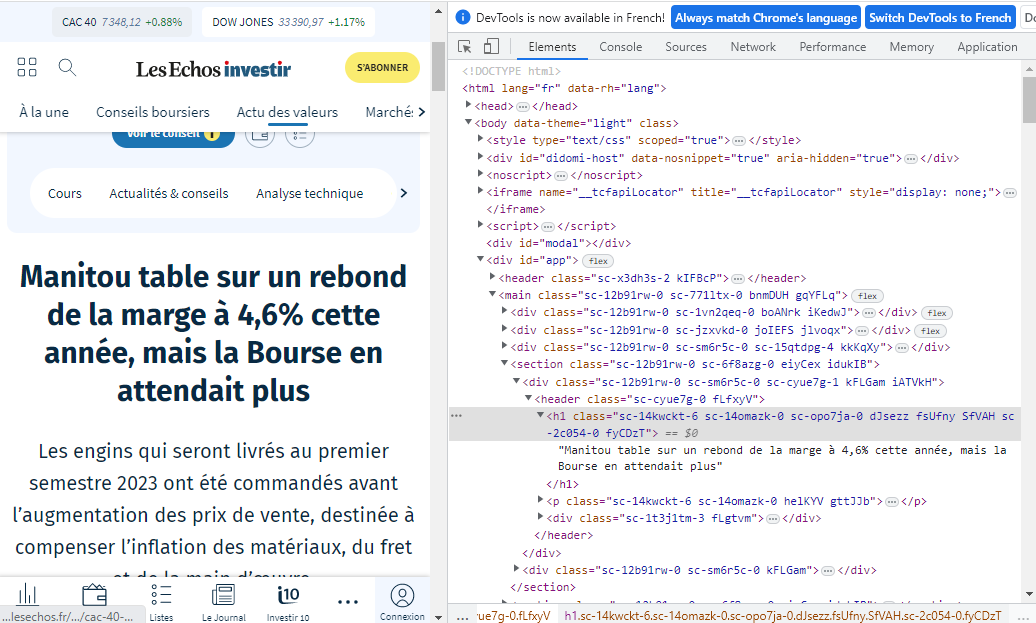

Pour récupérer le texte de l'article, il faut identifier l'emplacement de chaque mot et le sélectionner, puis concaténer tous les mots pour former le texte. Cette façon de procéder est lourde et prend du temps. De plus, la structure du code HTML peut différer d'une page à l'autre et il est difficile d'automatiser le processus. C'est pourquoi nous avons besoin d'une bibliothèque qui traite le code HTML de chaque page à notre place.
La bibliothèque de journaux est très utile car elle nous aide à obtenir directement les informations dont nous avons besoin sans passer par le code HTML de la page Web. En effet, la structure du code peut être différente d'une page web à l'autre. Cette bibliothèque est un gain de temps.






## **3. Reprendre votre programme de scrapping et le compléter de manière à mettre à jour votre base de données avec le texte des articles du flux RSS et le lien vers l'image illustrant l’article lorsqu’il y en a une. Vous pouvez inclure d’autres informations qui vous semblent utile pour un traitement ultérieur**

> Nous définissons une fonction de scrapping qui prend en entrées une base de données existante ainsi qu'une liste de flux à écouter et retourne une base de données actualisée au format dataframe contenant tous les articles scrappées aussi bien nouvellement que celles existantes.

> En bonus, la fonction fournit également les informations suivantes : 
* la taille de la base de données d'entrée ;
* la taille de la base de données **après mise à jour** ;
* et le nombre de nouveaux articles.
 
>Ces informations permettent d'avoir _une vue_ sur la mise à jour effectuée.




In [ ]:
rss_url = list(source.values())

In [ ]:
def scrapping(rss_url, database):
  """
  La fonction prend en entrées:
  - un objet rss_url de type liste qui comprend les flux de données à écouter 
  - une base de données database au format dataframe dont les colonnes sont dans l'ordre : 
  'index', 'title', 'authors', 'content', 'image', 'date'

  Cette fonction récupère dans un premier temps tous les liens des articles contenues dans la base de
  données dans un ensemble (set), et crée une liste qui doit récupérer plus tard les différentes caractéristiques
  des articles scrappées.
  Ensuite elle itère sur chaque flux de données contenue dans la liste des flux pour collecter les liens des articles
  stockées dans le dictionnaire data.entries. On vérifie que le lien n'existe pas déjà dans la base de données. 
  Si il n'est pas présent dans la base de données, chaque lien collecté est scanné au moyen de la commande 
  Article() de la librairie newspaper3k pour parcourir le site sur lequel l'article a été publié, le télécharger, recenser 
  les caractéristiques de l'article tels que le titre, la date, le contenu, etc.

  Ces éléments sont ensuites sauvegardées dans un objet de type dataframe qu'on complète à la base de données existante.

  """
  articles = list()
  stored_url = set(database['index'])
  #Taille database avant extraction
  len_before_update = len(database)

  for url in rss_url:
    #lecture des flux de données RSS
    data = fp.parse(url) 
    #iterer sur les entrees du flux RSS
    for item in data.entries:
      #récupérer le lien de chaque article
      link = item.link
      #Vérifier si le lien est déjà contenu dans la base de données existante et passer à l'itération suivante le cas échéant
      if link in stored_url:
        continue
        #scanner l'article
      article = Article(link)
      article.download()
      article.parse()
      articles.append({ 
          'index': link,
          'title': article.title,
          'authors': article.authors,
          'content': article.text,
          'image': article.top_image,
          'date': str(article.publish_date)})
  
  database1 =  pd.DataFrame.from_dict(articles) #construction de la base de données des nouveaux articles
  database = pd.concat([database, database1], ignore_index=True) # Fusion des bases de données
   # Taille de la base de donnée après mise à jour
  len_after_update = len(database)
    # ------------------ Quelques informations --------------
  print('#--------------------------------------------------------------------------------#')
  print("taille de la base de données avant mise à jour : ", len_before_update)
  print("taille de la base de données après mise à jour : ", len_after_update)
  print("Nombre de nouveaux articles : ", len_after_update - len_before_update)
  print('#--------------------------------------------------------------------------------#')
    # --------------------------------------------------------
  return database
  

In [ ]:
data1 = scrapping(rss_url=rss_url, database=data)

#--------------------------------------------------------------------------------#
taille de la base de données avant mise à jour :  0
taille de la base de données après mise à jour :  80
Nombre de nouveaux articles :  80
#--------------------------------------------------------------------------------#


In [ ]:
data1

,index,title,authors,content,image,date
0,https://investir.lesechos.fr/actu-des-valeurs/...,"Manitou table sur un rebond de la marge à 4,6%...",[],Par La Rédaction d'Investir\n\nPublié le 3 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-03 14:52:20+01:00
1,https://investir.lesechos.fr/actu-des-valeurs/...,"Chat avec Rémi Le Bailly, le 6 mars",[],Par La Rédaction d'Investir\n\nPublié le 2 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-02 14:14:01+01:00
2,https://investir.lesechos.fr/actu-des-valeurs/...,Tesla se passera en partie à l’avenir des serv...,[],Par La Rédaction d'Investir\n\nPublié le 2 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-02 11:40:53+01:00
3,https://investir.lesechos.fr/actu-des-valeurs/...,"LVMH, en hausse de 2% sur le Cac 40, va rachet...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-01 12:05:03+01:00
4,https://investir.lesechos.fr/actu-des-valeurs/...,"Neoen, au plus bas depuis un an en Bourse, va ...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-01 11:16:41+01:00
...,...,...,...,...,...,...
75,https://investir.lesechos.fr/placements/immobi...,Le PEA-PME enfin compétitif pour le crowdfundi...,[],Par Olivier Cheilan\n\nPublié le 9 févr. 2023 ...,https://media.lesechos.com/api/v1/images/view/...,2023-02-09 16:22:43+01:00
76,https://investir.lesechos.fr/placements/immobi...,Immobilier : est-ce encore le bon moment pour ...,[],Par Sandra Mathorel\n\nPublié le 7 févr. 2023 ...,https://media.lesechos.com/api/v1/images/view/...,2023-02-07 15:36:09+01:00
77,https://investir.lesechos.fr/marches-indices/b...,Le Royaume-Uni explore la possibilité d’un « B...,[],Par Arthur Le Denn\n\nPublié le 7 févr. 2023 à...,https://media.lesechos.com/api/v1/images/view/...,2023-02-07 15:17:23+01:00
78,https://investir.lesechos.fr/placements/assura...,Le Sénat pour la possibilité de changer d’assu...,[],Par Remy Demichelis\n\nPublié le 1 févr. 2023 ...,https://media.lesechos.com/api/v1/images/view/...,2023-02-01 16:41:37+01:00


In [ ]:
data1.to_csv('data.csv')

In [ ]:
data = pd.read_csv('data.csv')

## **4. Les images étant susceptibles de ne pas rester sur le site web, il faudrait idéalement en faire une copie locale dans notre base de données pour pouvoir s'y référerer ultérieurement. Comment procéderiez-vous pour ce faire ? On ne vous demande pas de faire le programme correspondant, juste de donner l’idée de comment vous vous y prendriez.**



> Les sites web s'actualisent régulièrement et de ce fait certains articles disparaissent avec leur contenu, leur image etc. Avec le programme scrapping écrit précédemment nous ne stockons que les liens des images et non les images en elles mêmes. Pour pouvoir s'y référer ultérieurement, la solution serait de télécharger également les images dans notre base de données au moment où on collecte les autres informations qui y sont liées. En enregistrant directement  le fichier image dans notre base de données, on pourra ensuite enregistrer la base de données en informations binaires avec la bibliothèque pickle. Pour un meilleur stockage des données, nous pourrions utiliser SQL et sauvegarder l'élément binaire pickle dans un tableau binaire en SQL. Cela pourrait être long, mais avec une classe DAO nous pourrions stocker en local toutes les informations nécessaires (nom, titre, fichiers images...).



## **5. Donnez une idée d’une (ou plusieurs) autre(s) source(s) que l’on pourrait-on écouter pour collecter des informations complémentaires sur ces articles ? Sans donner le code, donnez une idée de ce que l’on pourrait collecter sur ces sources et de la/des librairie(s) qui pourrai(en)t nous aider en cela.**

> On peut écouter les flux provenant des sites comme france24, Le figaro, france tv info, le Monde, l'Equipe, Francesoir, Futura-sciences, etc. On peut collecter des informations sur les débats politiques, les technologies, l'avancée de la science, les actualités du monde, l'économie, la crise entre l'Ukraine et la Russie, etc. On pourrait utiliser le framework BeautifulSoup4 (bs4) et la librairie Scrapy qui sont très populaires pour le web scrapping. 



In [ ]:
# Les sources de france24
source1 = [
            "https://www.france24.com/fr/rss",
            "https://www.france24.com/fr/%C3%A9co-tech/rss",
            "https://www.france24.com/fr/sports/rss",
            "https://www.france24.com/fr/culture/rss",
            "https://www.france24.com/fr/environnement/rss",
            "https://www.france24.com/fr/tag/entr/rss",
            "https://www.francetvinfo.fr/politique.rss",
            "https://www.francetvinfo.fr/societe.rss",
            "https://www.francetvinfo.fr/faits-divers.rss",
            "https://www.francetvinfo.fr/societe/justice.rss"
            ]

#Les sources provenant de LeMonde et figaro
source2 = ["https://www.lemonde.fr/rss/une.xml",
            "https://www.lefigaro.fr/rss/figaro_actualites.xml",
            "https://www.lefigaro.fr/rss/figaro_flash-actu.xml",
            "https://www.lefigaro.fr/rss/figaro_politique.xml",
            "https://www.lefigaro.fr/rss/figaro_politique_le-scan.xml",
            "https://www.lefigaro.fr/rss/figaro_elections.xml",
            "https://www.lefigaro.fr/rss/figaro_lefigaromagazine.xml"
            ]

source3 = ["https://www.lepoint.fr/rss.xml",
            "https://www.lejournaldesarts.fr/rss.xml", 
            "https://www.lhistoire.fr/flux-rss.xml",
            "https://www.letudiant.fr/rss.html"
            ]
#Les flux provenant de l'Equipe, Francesoir, Futura-sciences
source4 = [ "https://dwh.lequipe.fr/api/edito/rss?path=/",
            "https://www.francesoir.fr/rss.xml",
            "https://www.futura-sciences.com/rss/actualites.xml"
            ]
#Les flux provenant de ladepeche et de l'Independant
source5 = ["https://www.ladepeche.fr/rss.xml",
            "https://www.lindependant.fr/rss.xml"
            ]

In [ ]:
rss_urls = rss_url + source1+ source2+ source3+ source4+ source5

In [ ]:
data = pd.read_csv('data.csv')


In [ ]:
#On extrait les articles de toutes les sources susmentionnées
data = scrapping(rss_url=rss_url, database=data)

#--------------------------------------------------------------------------------#
taille de la base de données avant mise à jour :  3000
taille de la base de données après mise à jour :  3080
Nombre de nouveaux articles :  80
#--------------------------------------------------------------------------------#


# **Extraction d’information**

## **Extraction des entités nommées**

In [ ]:
# load pipeline and related models
nlp = spacy.load("fr_core_news_md")
# process text with pipeline
doc = nlp("Jean Dupont est maire de Plouguemeur. Apple n’y a pas de locaux.")
# list e that were detected
for e in doc.ents:
  print(e.text, e.start, e.end, e.label_)


Jean Dupont 0 2 PER
Plouguemeur 5 6 LOC
Apple 7 8 ORG


## **7. A quoi correspondent les étiquettes IOB utilisées ? Expliquer brièvement une technique (description de la tâche, du modèle) pour la détection des entités nommées.**
>


> Pour détecter les entités nommés, **Spacy** utilise un modèle pré-entrainé. En effet, pour chaque token le modèle est capable de prédire s'il s'agit d'une entité nommée et, le cas échéant, donne entre autres le **label_** (type)correspondant à l'entité nommée rencontrée. Dans le même processus, chaque token se voit attribué une étiquette IOB (**ent_iob**) à 4 modalités qui sert à tagger une entité nommée : 
* **3** = le token est le début d'une entité ;
* **2** = le token n'appartient pas à une entité ;
* **1** = le token appartient à une entité ;
* **0** = aucune entité n'est reconnue.

> Dans le sigle IOB, B signifie début de l'entité, I à l'intérieur de l'entité et O extérieur à l'entité.
Par exemple : "Jean Dupont est maire de Plouguemeur".
Jean est un B_per, Dupont est un I_per et Plouguemeur est B_loc


>Il est important de souligner que comme **Spacy** utilise un model pré-entrainé pour détecter les entités nommées, cela pourrait conduire à des erreurs de prédiction des labels. Ainsi, il faudra être critique à l'égard des résultats qui suivront.



## ***Analyse des entités nommées***

## **8) Ecriture d'un programme qui traite l’ensemble des textes  depuis le fichier lesechos.json et stock pour chaque article les entités trouvées et les informations afférentes (type, span)**



> Nous utiliserons notre base de données précédemment mise à jour pour répondre à toutes les questions à partir de la question 8. En effet, nous avons pu recueillir **3000** articles de plusieurs sources y compris les echos. Ces articles présentent un intérêt parce qu'ils sont très récents et s'étendent sur la période de fin février à début mars, ce qui nous permet d'avoir des informations très actuelles.


> * Il s'agit d'appliquer la chaine de traitement de **Spacy** pour détecter les entités nommées tout en prenant soin d'optimiser le temps de calcul. Pour ce faire, on prend soin de désactiver 'tagger', 'parser' & 'lemmatizer' qui ne nous intéressent pas.
  
>* **Le code :** pour chaque article de la base de données, on applique la chaîne de traitement sur son contenu textuel puis on extrait les entités et leur label pour les stocker dans une base de données. Cette première itération sauvegarde les éléments dans une liste de liste, propice pour l'ajouter à un dataframe.

>On réalise une seconde boucle qui stocke les informations dont on a besoin non plus dans des listes de listes mais dans des listes sans doublons pour les entitités nommées, et les différents types 'PER', 'ORG' et 'LOC'.








In [ ]:
data_final=pd.read_csv('data_final.csv')

In [ ]:
# Nous récupérons le contenu de la colonne 'content' où se trouve les contenus des articles
texts=data_final['content'].tolist()

>* Nous passons ensuite ces textes dans un flux de traitement spacy pour ensuite récupérer les entités nommées présentes dans chaque article , leurs types ainsi que les positions de début et de fin qu'occupent  ces entités dans les textes.

In [ ]:
nlp = spacy.load("fr_core_news_md", disable=['tagger', 'parser','lemmatizer'])
docs = list(nlp.pipe(texts))
content=list()
start=list()
end=list()
label=list()

#On boucle sur tous les articles
for doc in docs:
    # On ajoute les éléments dans des listes prédéfinies
      content.append([ent.text for ent in doc.ents]) 
      start.append([ent.start for ent in doc.ents])
      end.append([ent.end for ent in doc.ents])
      label.append([ent.label_ for ent in doc.ents])
      

In [ ]:
#créer une copie de data_final
echos.copy=data_final

Puis on crée de nouvelles colonnes qu'on ajoute à la base de données.

In [ ]:
echos.copy['ent.content']=content
echos.copy['ent.start']=start
echos.copy['ent.end']=end
echos.copy['ent.label']=label

echos.copy

## **9. Pour chaque type d’entité, déterminer les 20 plus fréquentes dans la collection de documents. Commentez le résultat obtenu. On mémorisera ces entités dans trois listes distinctes (une par type d’entité)**

  
>* Il s'agit de déterminer respectivement les 20 personnalités, organisations et localités les plus fréquemment mentionnées dans les articles du site web echos ainsi que des autres sites scrappés. En d'autres termes, on veut récupérer et compter les entités dont les (types) label_ sont 'PER', 'ORG' et 'LOC' respectivement après l'application de la chaîne de traitement.

>* **Le code :** On réalise une seconde boucle qui stocke les informations dont on a besoin non plus dans des listes de listes mais dans des listes pour les entitités nommées, et les différents types 'PER', 'ORG' et 'LOC'.

In [ ]:
# récupérer sans tenir compte de article par article : liste globale tout  article confondu
per_ent =list()
org_ent =list()
loc_ent =list()
for doc in docs:
    for ent in doc.ents:
      if ent.label_ =='PER':
        per_ent.append(ent.text )
      elif ent.label_ =='ORG':
        org_ent.append(ent.text )
      elif ent.label_ =='LOC':
        loc_ent.append(ent.text)
      

Le code de la cellule ci-dessous permet d'extraire et d'afficher les 20 personnalités les plus fréquemment mentionnées dans les articles scrappés. On remarque que les personnalités les plus fréquemment mentionnées sont mondialement connues à l'instar de **Emmanuel Macron, Poutine, Florent Pagny, Pierre Palmade**. **Leslie et Kevin** reviennent également fréquemment parce qu'ils font l'actualité en cemoment: en effet, il y a une enquête en cours du fait de leur disparition étrange et leurs deux corps retrouvés lors des fouilles. **Pierre Palmade** est un célèbre acteur, humoriste français qui est impliqué dans un accident grave. Cependant, on constate aussi la présence de **Bouquet** qui peut soit renvoyer à un nom de personnalité soit simplement un nom commun 'bouquet de fleur'. En regardant dans l'actualité, le nom **Bouquet** ne figure dans les news qu'en début d'année janvier 2023. Or, nos données sont extraites pour la plupart en fin février-début mars 2023 . Ceci pourrait être une erreur de prédiction du modèle pré-entrainé de Spacy. De même on constate par exemple que le modèle considère que **Leslie** est différent de **Leslie Hoorelbeke** et ne les regroupe pas ensemble.

In [ ]:
# Les entités plus fréquentes du type 'PER'
(unique, counts) = numpy.unique(per_ent, return_counts=True)
d = {'entity_PERS': unique, 'frequency': counts}
df_per = pd.DataFrame(data=d)
df_per = df_per.sort_values(by='frequency', ascending=False)

# 20 plus frequentes entités
df_per.head(20)


,entity_PERS,frequency
178,Leslie,660
284,Pierre Palmade,531
92,Emmanuel Macron,330
165,Kevin,300
286,Poutine,270
61,Claude Delbourg,240
120,Hakim K.,210
58,Chérif Bekkal,210
99,Florent Pagny,180
259,Olivier Véran,180


In [ ]:
#sauvegarde des 20 plus fréquentes entités de type PER
per_ent_20 = df_per['entity_PERS'].head(20)

Le code de la cellule ci-dessous permet d'extraire et d'afficher les 20 organisations les plus fréquemment mentionnées dans les articles scrappés. On remarque que les organisations les plus fréquemment mentionnées sont connues en France: **EDF, SNCF, Airbnb, BFMTV, INOUI, Carrefour**. On constate aussi la présence de **Parlement** dans cette liste. Spacy parvient à identifier l'organisation Parlement dans les articles scrappées. Toutefois, à notre sens ce n'est pas précis: ç'aurait été Parlemen français qu'on l'accepterait davantage comme organistation. Par ailleurs, le modèle considère **BFM TV** est différent de **BFMTV** et ne les regroupe pas ensemble.

In [ ]:
# Les entités plus fréquentes du type 'ORG'
(unique, counts) = np.unique(org_ent, return_counts=True)
d = {'entity_ORG': unique, 'frequency': counts}
df_org = pd.DataFrame(data=d)
df_org = df_org.sort_values(by='frequency', ascending=False)
# 20 plus frequentes entités
df_org.head(20)

,entity_ORG,frequency
74,EDF,330
168,Racing,300
179,SNCF,270
38,CGT,270
202,USAP,240
170,Racing Club Narbonnais,210
209,VNF,210
174,Reuters,180
28,BFMTV,158
13,Airbnb,150


In [ ]:
#sauvegarde des 20 plus fréquentes entités de type ORG
org_ent_20 = df_org['entity_ORG'].head(20)

Le code de la cellule ci-dessous permet d'extraire et d'afficher les 20 localités les plus fréquemment mentionnées dans les articles scrappés. On remarque que les localités les plus fréquemment mentionnées sont **Nanterre, Perpignan, Ukraine, Audois, Russie**. Cependant, on constate aussi la présence de **Français** dans cette liste. Ceci pourrait être dû à une erreur de prédiction du modèle pré-entrainé de Spacy. De même, on constate par exemple que le modèle considère que **France** est différent de **la France** et ne les regroupe pas.

In [ ]:
# Les entités plus fréquentes du type 'LOC'
(unique, counts) = np.unique(loc_ent, return_counts=True)
d = {'entity_LOC': unique, 'frequency': counts}
df_loc = pd.DataFrame(data=d)
df_loc = df_loc.sort_values(by='frequency', ascending=False)

# 20 pplus frequentes entités
df_loc.head(20)

,entity_LOC,frequency
266,Narbonne,1110
300,Perpignan,900
405,Ukraine,720
35,Audois,540
146,Français,510
342,Russie,450
57,Bourg-en-Bresse,450
143,France,420
460,la France,330
164,Grèce,330


In [ ]:
#sauvegarde des 20 plus fréquentes entités de type LOC
loc_ent_20 = df_loc['entity_LOC'].head(20)

## **10) Ecrivons une fonction qui prend en entrée une paire d’entités et les types correspondants et retourne le nombre de co-occurrences de ces deux entités au sein d’un même document dans la collection.**

La fonction de la cellule ci-dessous prend en entrée une paire d’entités et les types correspondants et retourne le nombre de co-occurrences de ces deux entités au sein d’un même article dans la collection. Elle itère sur l’ensemble des article stockés dans notre base de données **echos.copy** en regardant pour chacun la co-occurence de paire d'entités. Elle retourne le nombre de co-occurence.

**Explication du code** : on veut chercher le nombre de co-occurence des paires d’entités de type différents qui apparaissent le plus souvent ensemble. Les entités utilisées sont les 20 plus fréquentes stockées dans les listes per_ent_20, loc_ent_20 et org_ent_20 à la question 9. La cellule ci-dessous itère sur chaque paire de liste (par exemple (per_ent_20, loc_ent_20)) et applique la fonction **cooccurrence_entity** pour déterminer et stocker le nombre de co-occurrence.

In [ ]:
def cooccurrence_entity(paire = ['entity1', 'entity2'], type_paire = ['type1', 'type2']):
    # On va utiliser  la base données obtenue après le traitement pipeline
    occur = 0
    
    # On parcourt les articles de la base de données
    for item in echos.copy.index.tolist():
        # On test
        if (paire[0] in echos.copy.at[item,'ent.content']) and (paire[1] in echos.copy.at[item,'ent.content']):
            if (type_paire[0] in echos.copy.at[item,'ent.label']) and (type_paire[1] in echos.copy.at[item, 'ent.label']):
                occur = occur + 1
    return occur

Application de la fonction **cooccurrence_entity** : on cherche la paire d'entités ['USAP', 'Bayonne']

In [ ]:
nbre_occurrence = cooccurrence_entity(['USAP', 'Bayonne'], ['ORG', 'LOC'])
print("Nombre d'occurence ['USAP', 'Bayonne'] : ", nbre_occurrence)

Nombre d'occurence ['USAP', 'Bayonne'] :  120


## **11) En partant des listes de la question 9, on utilisera la fonction de la question précédente pour chercher les paires d’entités de type différents qui apparaissent le plus souvent ensemble. Commentez les résultats retournés.**

Le code suivant permet d'afficher les dix paires d'entités les plus fréquentes. On constate que le couple **(Leslie, Kevin)** de type **(PER, ORG)** est le plus fréquent. L'association des deux entités est logique et conforme à l'actualité des journaux. Cependant le type associé pour Kevin n'est pas le bon. De même, on remarque la présence de couple plus logique comme **(Leslie , Charente-Maritime)** et **(Kevin, Charente-Maritime)** de type **(PER, LOC)**. En effet, d'après les informations les corps de Leslie et Kévin ont été retrouvés à Charente-Maritime.

Nous avons également remarqué que les dix paires les plus fréquentes ont curieusement les mêmes nombres d'occurence c'est à dire 120.

In [ ]:
# On recupere les paires d'occurence les mots les plus fréquents
paire_most_freq = {}
paire_most_freq['paire_entites'] = list()
paire_most_freq['paire_type_entities'] = list()
paire_most_freq['nombre_occurence'] = list()

# On itère pour chaque paire d'entité de type (PER, ORG)
for ent1 in per_ent_20:
    for ent2 in org_ent_20:
        paire_most_freq['paire_entites'].append((ent1, ent2))
        paire_most_freq['paire_type_entities'].append(('PER', 'ORG'))
        paire_most_freq['nombre_occurence'].append(cooccurrence_entity([ent1, ent2], ['PER', 'ORG']))

# Puis, on itère pour chaque paire (PER, LOC)
for ent1 in per_ent_20:
    for ent2 in loc_ent_20:
        paire_most_freq['paire_entites'].append((ent1, ent2))
        paire_most_freq['paire_type_entities'].append(('PER', 'LOC'))
        paire_most_freq['nombre_occurence'].append(cooccurrence_entity([ent1, ent2], ['PER', 'LOC']))

# Enfin, on itère pour chaque paire (ORG, LOC)
for ent1 in org_ent_20:
    for ent2 in loc_ent_20:
        paire_most_freq['paire_entites'].append((ent1, ent2))
        paire_most_freq['paire_type_entities'].append(('ORG', 'LOC'))
        paire_most_freq['nombre_occurence'].append(cooccurrence_entity([ent1, ent2], ['ORG', 'LOC']))

In [ ]:
pair_freq = pd.DataFrame(paire_most_freq)
p= pair_freq.sort_values(by='nombre_occurence', ascending=False) # on tri par ordre décroissant
p.head(10) # on affiche les 10 premiers

,paire_entites,paire_type_entities,nombre_occurence
906,"(Racing Club Narbonnais, Bourg-en-Bresse)","(ORG, LOC)",120
14,"(Leslie, Kevin)","(PER, ORG)",120
419,"(Leslie, Charente-Maritime)","(PER, LOC)",120
892,"(USAP, Bayonne)","(ORG, LOC)",120
479,"(Kevin, Charente-Maritime)","(PER, LOC)",120
820,"(Racing, Narbonne)","(ORG, LOC)",120
900,"(Racing Club Narbonnais, Narbonne)","(ORG, LOC)",120
896,"(USAP, Pau)","(ORG, LOC)",120
826,"(Racing, Bourg-en-Bresse)","(ORG, LOC)",120
74,"(Kevin, Kevin)","(PER, ORG)",120


## **12) Reprenons l’analyse précédente en nous limitant aux entités qui apparaissent dans la même phrase. Plusieurs manières simples d’accéder aux informations sur les entités et les phrases, en combinant les informations sur chacun des tokens, la segmentation en phrase et le résultat de la détection des entités en s’appuyant sur la notion de span (portion du document initial). Les exemples suivants nous illustrent les informations dont nous disposons pour chaque doc issu de l’analyse d’un texte par spaCy.**

In [ ]:
nlp = spacy.load("fr_core_news_md", exclude=['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer'])
nlp.add_pipe('sentencizer')
doc=nlp("Jean Dupont est maire de Plouguemeur. Apple n’y a pas de locaux.")
# list tokens with NER and sentence info
for token in doc:
  print(token, token.ent_iob_, token.ent_type_, token.is_sent_start)
print(' ======'*5)
# list entities and the corresponding tokens
for e in doc.ents: # e est un span du document
  print(e.text, e.start, e.end, e.label_, doc[e.start:e.end])
print(' ======'*5)
# list sentences and related informatio
for s in doc.sents: # s est un span du document
  print(s, s.start, s.end, [tok for tok in s], [e for e in s.ents])


Jean B PER True
Dupont I PER False
est O  False
maire O  False
de O  False
Plouguemeur B LOC False
. O  False
Apple B ORG True
n’ O  False
y O  False
a O  False
pas O  False
de O  False
locaux O  False
. O  False
 ====== ====== ====== ====== ======
Jean Dupont 0 2 PER Jean Dupont
Plouguemeur 5 6 LOC Plouguemeur
Apple 7 8 ORG Apple
 ====== ====== ====== ====== ======
Jean Dupont est maire de Plouguemeur. 0 7 [Jean, Dupont, est, maire, de, Plouguemeur, .] [Jean Dupont, Plouguemeur]
Apple n’y a pas de locaux. 7 15 [Apple, n’, y, a, pas, de, locaux, .] [Apple]


In [ ]:
#Recuperer les entités de toutes les phrases
Listentities=[]
for s in doc.sents: # s est un span du document
  Listentities=Listentities+[e for e in s.ents]
print(Listentities)
print ("-----"*6)
for e in Listentities :
  print(e, e.label_, type(e))
print(10*"--")
for s in doc.sents: # s est un span du document
  print(s.start, s.end, [tok for tok in s], [(e, e.start, e.end, e.label_) for e in s.ents])

[Jean Dupont, Plouguemeur, Apple]
------------------------------
Jean Dupont PER <class 'spacy.tokens.span.Span'>
Plouguemeur LOC <class 'spacy.tokens.span.Span'>
Apple ORG <class 'spacy.tokens.span.Span'>
--------------------
0 7 [Jean, Dupont, est, maire, de, Plouguemeur, .] [(Jean Dupont, 0, 2, 'PER'), (Plouguemeur, 5, 6, 'LOC')]
7 15 [Apple, n’, y, a, pas, de, locaux, .] [(Apple, 7, 8, 'ORG')]


In [ ]:
#On repasse le processing incluant le sentencizer sur les données
docs = list(nlp.pipe(texts))
sentence=list()
entities=list()# liste de liste qui va récupérer les entités nommées de toutes les phrases de tous les documents
token=list()# liste de liste qui va récupérer les tokens de toutes les phrases de tous les documents
label=list()# liste de liste qui va récupérer les types des entités nommées de toutes les phrases de tous les documents

for doc in docs:
  sentence.append([s for s in doc.sents])
  Listentities=[] # liste qui va récupérer les entités de toutes les phrases d'un document
  Listtoken=[] # liste qui va récupérer les tokens de toutes les phrases d'un document
  Listlabel=[] # liste qui va récupérer les types des entités de toutes les phrases d'un document
  for s in doc.sents: # s est un span du document
    Listentities.append([str(e) for e in s.ents])
    Listtoken.append([str(tok) for tok in s])
    Listlabel.append([e.label_ for e in s.ents])
  entities.append(Listentities)
  token.append(Listtoken)
  label.append(Listlabel)

In [ ]:
entities

In [ ]:
#Ajout des listes précédemment créées à un nouvel dataframe echos.copy2
echos.copy2=echos.copy
echos.copy2['sentence']=sentence
echos.copy2['entities']=entities
echos.copy2['token']=token
echos.copy2['label']=label

<ipython-input-83-9850fe136589>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  echos.copy2=echos.copy


In [ ]:
#On accède aux entités nommées de la première phrase du premier article de la base de données
echos.copy2['entities'][0][0]

['TF1', 'Florent Pagny']

In [ ]:

# Définir fonction de cooccurence dans la phrase
def cooccurrence_entity_sentence(paire = ['entity1', 'entity2'], type_paire = ['type1', 'type2']):
    # On va utiliser  la base données' obtenue après le traitement pipeline
    occur = 0
    
    # On parcours les articles de la base de données
    for item in echos.copy2.index.tolist():
      for i in range(len(echos.copy2.at[item,'entities'])):
        # On test
        if (paire[0] in echos.copy2.at[item,'entities'][i]) and (paire[1] in echos.copy2.at[item,'entities'][i]):
            if (type_paire[0] in echos.copy2.at[item,'label'][i]) and (type_paire[1] in echos.copy2.at[item, 'label'][i]):
                occur = occur + 1
    return occur

In [ ]:
nbre_occurrence_sent = cooccurrence_entity_sentence(['USAP', 'Bayonne'], ['ORG', 'LOC'])
print("Nombre d'occurence ['USAP', 'Bayonne'] : ", nbre_occurrence_sent)

Nombre d'occurence ['USAP', 'Bayonne'] :  150


In [ ]:
# On recupère les paires d'occurence des entités par phrase
paire_most_freq_sent = {}
paire_most_freq_sent['paire_entites'] = list()
paire_most_freq_sent['paire_type_entities'] = list()
paire_most_freq_sent['nombre_occurence'] = list()

# On itère pour chaque paire d'entité de type (PER, ORG)
for ent1 in per_ent_20:
    for ent2 in org_ent_20:
        paire_most_freq_sent['paire_entites'].append((ent1, ent2))
        paire_most_freq_sent['paire_type_entities'].append(('PER', 'ORG'))
        paire_most_freq_sent['nombre_occurence'].append(cooccurrence_entity([ent1, ent2], ['PER', 'ORG']))

# Puis, on itère pour chaque paire (PER, LOC)
for ent1 in per_ent_20:
    for ent2 in loc_ent_20:
        paire_most_freq['paire_entites'].append((ent1, ent2))
        paire_most_freq['paire_type_entities'].append(('PER', 'LOC'))
        paire_most_freq['nombre_occurence'].append(cooccurrence_entity_sentence([ent1, ent2], ['PER', 'LOC']))

# Enfin, on itère pour chaque paire (ORG, LOC)
for ent1 in org_ent_20:
    for ent2 in loc_ent_20:
        paire_most_freq_sent['paire_entites'].append((ent1, ent2))
        paire_most_freq_sent['paire_type_entities'].append(('ORG', 'LOC'))
        paire_most_freq_sent['nombre_occurence'].append(cooccurrence_entity_sentence([ent1, ent2], ['ORG', 'LOC']))

In [ ]:
pair_freq_sent = pd.DataFrame(paire_most_freq_sent)
p= pair_freq_sent.sort_values(by='nombre_occurence', ascending=False)
p.head(10)

,paire_entites,paire_type_entities,nombre_occurence
492,"(USAP, Bayonne)","(ORG, LOC)",150
74,"(Kevin, Kevin)","(PER, ORG)",120
14,"(Leslie, Kevin)","(PER, ORG)",120
204,"(Aimé-Giral, USAP)","(PER, ORG)",90
254,"(Leslie Hoorelbeke, Kevin)","(PER, ORG)",90
234,"(Kevin Trompat, Kevin)","(PER, ORG)",90
638,"(Rassemblement national, RN)","(ORG, LOC)",60
494,"(USAP, Brive)","(ORG, LOC)",60
426,"(Racing, Bourg-en-Bresse)","(ORG, LOC)",60
496,"(USAP, Pau)","(ORG, LOC)",60


## **13) Parmi les relations correspondant aux paires d’entités dont la fréquence de co-occurrence est élevée (cf . question 9), on cherche à en trouver quelques unes qui peuvent être caractérisées par un verbe.**

In [ ]:
#On repasse le processing incluant le sentencizer sur les données
nlp = spacy.load("fr_core_news_md")
nlp.add_pipe('sentencizer')
docs = list(nlp.pipe(texts))
sentence=list()
entities=list()
lemma=list()
token=list()
label=list()

for doc in docs:
  sentence.append([s for s in doc.sents])
  Listentities=[]
  Listtoken=[]
  Listlabel=[]
  for s in doc.sents: # s est un span du document
    Listentities.append([str(e) for e in s.ents])
    Listtoken.append([str(tok) for tok in s])
    Listlabel.append([e.label_ for e in s.ents])
  entities.append(Listentities)
  token.append(Listtoken)
  label.append(Listlabel)

On cherche à caractériser une paire d'entités par un verbe de la même phrase que cette dernière. Pour cela, on écrit une fonction qui prend en entrée deux entitées et leurs types respectifs et qui analyse l’ensemble des documents où ces entités apparaissent dans la même phrase de manière à établir la liste des verbes qui apparaissent dans ces phrases. Elle itère sur l'ensemble des articles de la base de données **echos.copy** et pour chaque article:
* 1) applique la chaîne de trainement de Spacy sur son contenu ;
* 2) extrait ses entités et leur label_ (type);
* 3) vérifie si la paire d'entités en entrée de la fonction est dans la liste des entités de l'article;
* 4) si oui, pour chaque phrase dans laquelle apparait la paire d'entités on extrait les verbes ;
* 5) on stocke et retourne la liste des verbes

In [ ]:
def get_verbs_from_entity_paire(paire = ['entity1', 'entity2'], type_paire = ['type1', 'type2']):
    # On initialise une list pour récupérer les verbes des toutes les phrases où les entités apparaissent
    list_verb = []
    
    # On parcours les articles de la base de données
    for item in echos.copy2.index.tolist():
        # On applique à chaque article le traitement spacy pipeline
        article_pipe = nlp(echos.copy2.at[item,'content'])
        
        # On recupère les entités correspond à chaque article
        ent_text = []
        ent_label = []
        
        for ent in article_pipe.ents:
            # On recupère toutes les entités et les types
            ent_text.append(ent.text)
            ent_label.append(ent.label_)
        
        # On garde les articles dans lesquels ont trouve la paire d'entités et leur type
        if (paire[0] in ent_text) and (paire[1] in ent_text):
            if (type_paire[0] in ent_label) and (type_paire[1] in ent_label):
                
                # On recupère la phrase dans laquelle se trouve la paire d'entités
                for sent in article_pipe.sents :
                    if (paire[0] in str(sent)) and (paire[1] in str(sent)):
                        
                        # On applique le trainement spacy pipeline à la phrase
                        phrase_pipe = nlp(str(sent))
                        
                        # On recupère les verbes
                        for token in phrase_pipe:
                            if token.pos_ == 'VERB':
                                list_verb.append(token.text)
    # On return la liste des verbes trouvés dans toutes les phrases ou la paire apparaît
    return list_verb

## **14) En utilisant la fonction de la question précédente, déterminons  quelques couples d’entités et un verbe associé qui paraissent faire sens.**

Il s'agit de choisir une paire d'entités, d'appliquer la fonction **get_verbs_from_entity_paire** et d'analyser les résultats. On choisit les couples ('USAP', 'Bayonne') de type ('ORG', 'LOC')et ('Leslie', 'Kevin') de type ('PER', 'LOC').

Pour analyser la liste des verbes renvoyés pour la paire ('USAP', 'Bayonne'), nous allons porter notre attention sur les verbes les plus fréquents. On peut caractériser la relation entre 'USAP'et 'Bayonne' par les verbes **battu**, **concrétiser**, **opposant** qui réflètent le match de rugby qui a opposé l'équique de l'USAP aux Basques de Bayonne. 
  
Dans cette liste de verbes, l'occurence est la même pour tous les verbes. On peut donc formuler d'autres phrases pour caractériser la relation entre USAP et Bayonne.  
* C'est un match qui **promet** entre l'USAP et la Bayonne.
* L'USAP **recevait** la Bayonne.



In [ ]:
verbs = get_verbs_from_entity_paire(['USAP', 'Bayonne'], ['ORG', 'LOC'])
verbs

In [ ]:
# les verbs les plus frequents
def verbs_freq(verbs):
  (unique, counts) = np.unique(verbs, return_counts=True)
  d = {'Verb': unique, 'Frequence': counts}
  df_verb = pd.DataFrame(data=d)
  df_verb = df_verb.sort_values(by='Frequence', ascending=False)
  df_verb
  # 20 plus frequents verbes
  return(df_verb.head(20))


In [ ]:
verbs_freq(verbs)

,Verb,Frequence
0,a,30
1,assistait,30
2,battu,30
3,concrétisé,30
4,concrétisée,30
5,faudra,30
6,imposée,30
7,monter,30
8,opposant,30
9,promet,30


Pour analyser la liste des verbes renvoyés pour la paire ('Leslie', 'Kevin'), nous allons porter notre attention sur les verbes les plus fréquents. On peut caractériser la relation entre 'Leslie'et 'Kevin' par les verbes **retrouvés**, **disparu** qui réflètent le fait qu'il s'agit de deux personnes qui ont disparu depuis novembre 2022 et dont les corps ont été retrouvés. 


In [ ]:
resultat= get_verbs_from_entity_paire(['Leslie', 'Kevin'], ['PER','ORG'])

In [ ]:
(unique, counts) = np.unique(resultat, return_counts=True)
d = {'Verb': unique, 'Frequence': counts}
df_verb = pd.DataFrame(data=d)
df_verb = df_verb.sort_values(by='Frequence', ascending=False)
df_verb
# 20 plus frequents verbes
df_verb.head(20)

,Verb,Frequence
18,lire,270
23,placé,210
21,mis,150
26,retrouver,120
6,disparu,90
4,concentrent,60
28,retrouvés,60
27,retrouvé,30
17,lancées,30
25,rendaient,30


## **15. En quoi les couples et verbes identifiés à la question précédente peuvent-ils être utiles pour trouver de nouvelles relations et/ou grouper des relations de même nature ?**

> Ces verbes permettent de caractériser une liaison entre les paires d'entités et donc peuvent servir à définir de nouvelles relations entre ces entités en appliquant le lemmatizer.



## **16. Comment pourrait-on affiner cette analyse en utilisant l’arbre de dépendance syntaxique ?**


> L'arbre de dépendance syntaxique permet d'identifier les relations de dépendance entre les mots dans une phrase. En utilisant ces informations, il est possible d'extraire des informations plus précises sur le texte, telles que les sujets et les objets d'une action, les qualificatifs d'un nom, etc. Cela peut nous aider à mieux comprendre le sens  de la phrase et à identifier les nuances grammaticales qui pourraient être importante pour la compréhension globale. 



In [ ]:
#nlp = spacy.load("fr_core_news_md")
spacy.displacy.render(docs[0:2], style="dep", jupyter=True, options={'distance': 130})